# CRPropa example

In [1]:
import crpropa
import numpy as np

M = crpropa.ParticleMapsContainer()

# Alternatively, data can be added manually.
# This provides freedom to adapt to customized weights used in the simulation
for i in range(1000):
    particleId = crpropa.nucleusId(1,1)
    energy = 10 * crpropa.EeV
    galCenter = crpropa.Vector3d(-1,0,0)
    momentumVector = crpropa.Random.instance().randFisherVector(galCenter, 200)
    M.addParticle(particleId, energy, momentumVector)

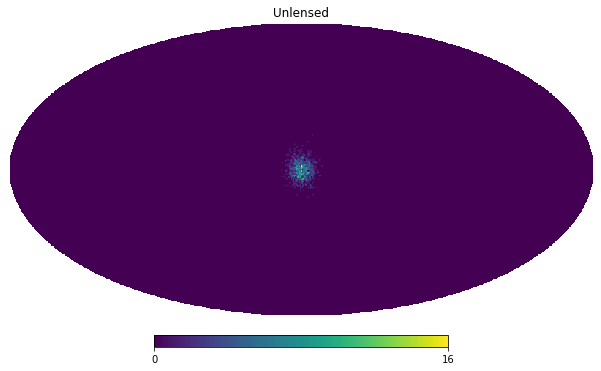

In [2]:
import healpy
import matplotlib.pyplot as plt


#stack all maps
crMap = np.zeros(49152)
for pid in M.getParticleIds():
    energies = M.getEnergies(int(pid))
    for i, energy in enumerate(energies):
        crMap += M.getMap(int(pid), energy * crpropa.eV)

#plot maps using healpy
healpy.mollview(map=crMap, title='Unlensed')

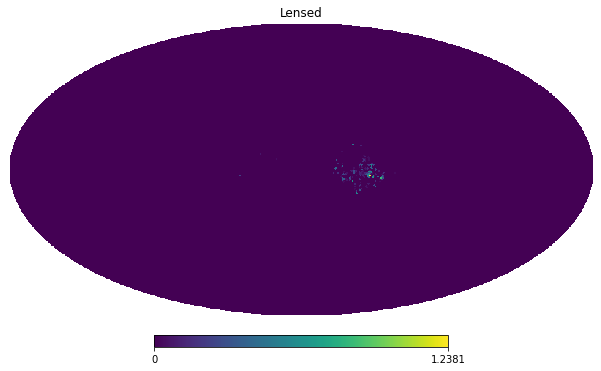

In [3]:
path_to_lens = os.path.join("lens", "JF12full_Gamale", "lens.cfg")
lens = crpropa.MagneticLens(path_to_lens)
M.applyLens(lens)

#stack all maps
crMap = np.zeros(49152)
for pid in M.getParticleIds():
    energies = M.getEnergies(int(pid))
    for i, energy in enumerate(energies):
        crMap += M.getMap(int(pid), energy * crpropa.eV )

#plot maps using healpy
healpy.mollview(map=crMap, title='Lensed')

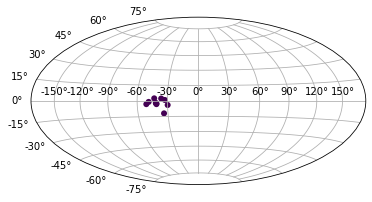

In [4]:
pids, energies, lons, lats = M.getRandomParticles(10)

# create a scatter plot of the particles
plt.subplot(111, projection='hammer')
plt.scatter(lons, lats, c=np.log10(energies), lw=0)
plt.grid()